In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

%matplotlib inline

<h1>Data Import</h1>

In [162]:
client_profiles_df = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/lessons/refs/heads/main/5_6_eda_inf_stats_tableau/project/files_for_project/df_final_demo.txt")
client_profiles_df


,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [163]:
df_web_data_1 = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/lessons/refs/heads/main/5_6_eda_inf_stats_tableau/project/files_for_project/df_final_web_data_pt_1.txt")
df_web_data_1

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
343136,2443347,465784886_73090545671,136329900_10529659391_316129,confirm,2017-03-31 15:15:46
343137,2443347,465784886_73090545671,136329900_10529659391_316129,step_3,2017-03-31 15:14:53
343138,2443347,465784886_73090545671,136329900_10529659391_316129,step_2,2017-03-31 15:12:08
343139,2443347,465784886_73090545671,136329900_10529659391_316129,step_1,2017-03-31 15:11:37


In [164]:
df_web_data_1.groupby(["client_id","visit_id","process_step"]).agg({"process_step":"count"}).head(40)

process_step
client_id visit_id                     process_step              
169       749567106_99161211863_557568 confirm                  1
                                       start                    1
                                       step_1                   1
                                       step_2                   1
                                       step_3                   1
555       637149525_38041617439_716659 confirm                  1
                                       start                    1
                                       step_1                   1
                                       step_2                   1
                                       step_3                   1
647       40369564_40101682850_311847  confirm                  1
                                       start                    1
                                       step_1                   1
                                       step_2                   1
                                       step_3                   1
722       984487154_55831795985_521110 confirm                  1
                                       start                    2
                                       step_1                   3
                                       step_2                   2
                                       step_3                   1
934       7076463_57954418406_971348   start                    4
1028      557292053_87239438319_391157 start                    1
                                       step_1                   5
                                       step_2                   2
                                       step_3                   1
1186      507052512_11309370126_442139 start                    1
          795373564_99931517312_810896 start                    1
                                       step_1                   1
                                       step_2                   1
1195      393817425_39015278493_996341 confirm                  1
                                       start                    1
                                       step_1                   1
                                       step_2                   1
                                       step_3                   1
1197      71862471_21202285428_848395  confirm                  1
                                       start                    1
                                       step_1                   1
                                       step_2                   2
                                       step_3                   2
1368      784065271_45379483290_309335 start                    1

In [165]:
df_web_data_2 = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/lessons/refs/heads/main/5_6_eda_inf_stats_tableau/project/files_for_project/df_final_web_data_pt_2.txt")
df_web_data_2

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [166]:
df_web_data_merged = pd.concat([df_web_data_1, df_web_data_2], axis=0)
df_web_data_merged

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [167]:
df_final_experiment_clients =pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/lessons/refs/heads/main/5_6_eda_inf_stats_tableau/project/files_for_project/df_final_experiment_clients.txt")
df_final_experiment_clients

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


<h1>Data Cleaning</h1>

In [169]:
client_profiles_df.shape

(70609, 9)

In [170]:
client_profiles_df.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


In [171]:
client_profiles_df["gendr"].value_counts()

gendr
U    24122
M    23724
F    22746
X        3
Name: count, dtype: int64

In [172]:
client_profiles_df["num_accts"].value_counts()

num_accts
2.0    55497
3.0    12529
4.0     2241
5.0      284
6.0       33
7.0        8
1.0        2
8.0        1
Name: count, dtype: int64

In [173]:
client_profiles_df["calls_6_mnth"].value_counts()

calls_6_mnth
6.0    14112
1.0    11016
2.0    10252
3.0     8752
0.0     7732
4.0     7175
5.0     6627
7.0     4929
Name: count, dtype: int64

In [174]:
client_profiles_df.isnull().sum()

client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
dtype: int64

In [175]:
# dropping rows with null values

df_client_profiles = client_profiles_df.dropna(axis=0, how="any")

In [176]:
# Cleaning the age column, to only contain integers, to reduce the amount of ages represented
df_client_profiles['clnt_age'] = np.floor(df_client_profiles['clnt_age']).astype(int)

/var/folders/t2/40gs14tj4lg2536r26vzcyv40000gn/T/ipykernel_56388/2524163931.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_client_profiles['clnt_age'] = np.floor(df_client_profiles['clnt_age']).astype(int)


In [177]:
# summarizing the gender column 

df_client_profiles["gendr"] = df_client_profiles["gendr"].replace("X", "U")
df_client_profiles

/var/folders/t2/40gs14tj4lg2536r26vzcyv40000gn/T/ipykernel_56388/1879273022.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_client_profiles["gendr"] = df_client_profiles["gendr"].replace("X", "U")


,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68,M,3.0,475114.69,4.0,4.0


In [178]:
sns.countplot(data=df_client_profiles, x='num_accts', palette="Set3")

/var/folders/t2/40gs14tj4lg2536r26vzcyv40000gn/T/ipykernel_56388/3276336683.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_client_profiles, x='num_accts', palette="Set3")


<Axes: xlabel='num_accts', ylabel='count'>

In [179]:
df_client_profiles.describe().round(2)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
count,70594.00,70594.00,70594.00,70594.00,70594.00,70594.00,70594.00,70594.00
mean,5005025.75,12.05,150.66,46.18,2.26,147446.73,3.38,5.57
std,2877289.31,6.87,82.09,15.60,0.53,301510.58,2.24,2.35
min,169.00,2.00,33.00,13.00,1.00,13789.42,0.00,1.00
25%,2519542.75,6.00,82.00,32.00,2.00,37346.60,1.00,4.00
50%,5016973.50,11.00,136.00,47.00,2.00,63334.59,3.00,5.00
75%,7483074.25,16.00,192.00,59.00,2.00,137546.12,6.00,7.00
max,9999839.00,62.00,749.00,96.00,8.00,16320040.15,7.00,9.00


In [180]:
df_client_profiles.hist(figsize=(15, 20), bins=60, xlabelsize=10, ylabelsize=10);

In [181]:
# Merging Df Demographics with DF Variations

df_client_test_merged = df_client_profiles.merge(df_final_experiment_clients, how="inner", on = "client_id")
df_client_test_merged

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,836976,6.0,73.0,60,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33,F,2.0,103671.75,0.0,3.0,Control
...,...,...,...,...,...,...,...,...,...,...
70589,7993686,4.0,56.0,38,U,3.0,1411062.68,5.0,5.0,NaN
70590,8981690,12.0,148.0,31,M,2.0,101867.07,6.0,6.0,NaN
70591,333913,16.0,198.0,61,F,2.0,40745.00,3.0,3.0,NaN
70592,1573142,21.0,255.0,68,M,3.0,475114.69,4.0,4.0,NaN


In [182]:
df_clients_test = df_client_test_merged[df_client_test_merged["Variation"] == "Test"].reset_index(drop=True)
df_clients_test

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,836976,6.0,73.0,60,U,2.0,45105.30,6.0,9.0,Test
1,1439522,5.0,64.0,32,U,2.0,52467.79,6.0,9.0,Test
2,1562045,16.0,198.0,49,M,2.0,67454.65,3.0,6.0,Test
3,388801,30.0,361.0,57,M,5.0,522498.72,1.0,4.0,Test
4,8198645,15.0,189.0,54,F,2.0,382303.83,6.0,9.0,Test
...,...,...,...,...,...,...,...,...,...,...
26956,501496,23.0,281.0,35,F,2.0,32529.34,0.0,3.0,Test
26957,1780858,21.0,262.0,68,M,3.0,372100.59,6.0,9.0,Test
26958,5826160,20.0,249.0,56,F,2.0,44837.16,2.0,5.0,Test
26959,8739285,19.0,229.0,69,F,2.0,44994.24,1.0,4.0,Test


In [183]:
df_clients_test.describe()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
count,2.696100e+04,26961.000000,26961.000000,26961.000000,26961.000000,2.696100e+04,26961.000000,26961.000000
mean,4.999639e+06,11.982901,149.852899,46.885242,2.249917,1.489626e+05,3.061941,6.101851
std,2.877510e+06,6.844947,81.783390,15.524749,0.529335,3.073737e+05,2.190590,2.177119
min,5.550000e+02,2.000000,33.000000,17.000000,1.000000,2.378944e+04,0.000000,3.000000
25%,2.516570e+06,6.000000,82.000000,33.000000,2.000000,3.972920e+04,1.000000,4.000000
50%,5.025928e+06,11.000000,134.000000,47.000000,2.000000,6.546836e+04,3.000000,6.000000
75%,7.470213e+06,15.000000,191.000000,59.000000,2.000000,1.394786e+05,5.000000,8.000000
max,9.999832e+06,55.000000,669.000000,96.000000,7.000000,1.632004e+07,6.000000,9.000000


In [184]:
df_clients_test.hist(figsize=(15, 20), bins=60, xlabelsize=10, ylabelsize=10);

In [185]:
df_clients_control = df_client_test_merged[df_client_test_merged["Variation"] == "Control"].reset_index(drop=True)
df_clients_control

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,2304905,7.0,94.0,58,U,2.0,110860.30,6.0,9.0,Control
1,5126305,12.0,145.0,33,F,2.0,103671.75,0.0,3.0,Control
2,3727881,5.0,71.0,30,U,2.0,23915.60,0.0,3.0,Control
3,272934,5.0,66.0,58,U,2.0,27021.42,2.0,5.0,Control
4,285619,30.0,369.0,67,M,2.0,299388.72,3.0,6.0,Control
...,...,...,...,...,...,...,...,...,...,...
23521,6662941,7.0,84.0,36,F,2.0,83101.84,4.0,7.0,Control
23522,2787512,23.0,283.0,48,F,3.0,123618.60,1.0,4.0,Control
23523,9932367,23.0,280.0,57,F,2.0,94466.55,6.0,9.0,Control
23524,4079649,23.0,276.0,62,M,3.0,57575.28,4.0,7.0,Control


In [186]:
df_clients_control.describe().round(2)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
count,23526.00,23526.00,23526.00,23526.00,23526.00,23526.00,23526.00,23526.00
mean,5013676.13,12.09,151.06,47.26,2.26,150151.90,3.13,6.17
std,2877413.56,6.88,82.13,15.53,0.54,295812.41,2.18,2.17
min,1028.00,2.00,33.00,17.00,2.00,23789.61,0.00,3.00
25%,2515177.00,6.00,82.00,33.00,2.00,40122.95,1.00,4.00
50%,5023832.50,11.00,137.00,48.00,2.00,66031.45,3.00,6.00
75%,7483638.50,16.00,192.00,60.00,2.00,140615.63,5.00,8.00
max,9998921.00,55.00,669.00,96.00,7.00,8292996.21,6.00,9.00


In [187]:
df_clients_control.hist(figsize=(15, 20), bins=60, xlabelsize=10, ylabelsize=10);

In [188]:
df_clients_no_test = df_client_test_merged[df_client_test_merged["Variation"].isnull()== True].reset_index(drop=True)
df_clients_no_test

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,414870,6.0,80.0,57,U,2.0,492304.33,5.0,5.0,NaN
1,1047811,9.0,118.0,30,M,2.0,27085.88,5.0,5.0,NaN
2,6090170,5.0,62.0,28,U,2.0,39855.30,4.0,4.0,NaN
3,706631,16.0,193.0,56,U,2.0,52298.64,5.0,5.0,NaN
4,6844077,16.0,196.0,48,F,2.0,518763.48,7.0,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...
20102,7993686,4.0,56.0,38,U,3.0,1411062.68,5.0,5.0,NaN
20103,8981690,12.0,148.0,31,M,2.0,101867.07,6.0,6.0,NaN
20104,333913,16.0,198.0,61,F,2.0,40745.00,3.0,3.0,NaN
20105,1573142,21.0,255.0,68,M,3.0,475114.69,4.0,4.0,NaN


In [189]:
df_clients_no_test.describe().round(2)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
count,20107.00,20107.00,20107.00,20107.00,20107.00,20107.00,20107.00,20107.00
mean,5002128.07,12.11,151.27,43.98,2.26,142248.96,4.11,4.15
std,2876968.03,6.90,82.45,15.56,0.54,300124.15,2.19,2.18
min,169.00,2.00,33.00,13.00,1.00,13789.42,1.00,1.00
25%,2532094.50,6.00,82.00,30.00,2.00,30147.72,2.00,2.00
50%,4998573.00,11.00,138.00,45.00,2.00,56338.10,4.00,4.00
75%,7493638.50,16.00,193.00,56.00,2.00,130512.66,6.00,6.00
max,9999839.00,62.00,749.00,92.00,8.00,12838418.01,7.00,7.00


In [190]:
df_clients_no_test.hist(figsize=(15, 20), bins=60, xlabelsize=10, ylabelsize=10);

In [191]:
# After observation, No null value or cleaning had to be done on 'df_web_data_merged'
df_web_data_merged.isnull().sum()

client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64

# Student Portal Guideline Q&A (Day 1-2)

### Who are the primary clients using this online process?


In [194]:
client_profiles_df

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [195]:
client_profiles_df["gendr"].value_counts()

gendr
U    24122
M    23724
F    22746
X        3
Name: count, dtype: int64

In [196]:
total = client_profiles_df['gendr'].value_counts().sum()

# Calculate percentages
percentages = (client_profiles_df['gendr'].value_counts() / total * 100).round(2)

# See both counts and percentages in one DataFrame:
summary = pd.DataFrame({
    'count': client_profiles_df['gendr'].value_counts(),
    'percentage': percentages
})

# Visualization with plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x=client_profiles_df['gendr'].value_counts().index,
    y=client_profiles_df['gendr'].value_counts().values
)

# Customize the plot
plt.title('Gender Distribution', fontsize=14, pad=20)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add value labels on top of each bar
for i, v in enumerate(client_profiles_df['gendr'].value_counts().values):
    plt.text(i, v, str(v), ha='center', va='bottom')


### Are the primary clients younger or older? 

In [198]:
#The clients average age is 45 years old.
#The most represented age is 51 years old.

# if age > 40 = 'young'
# if age < 40 = 'old'
# then our primary clients are, in average, old.

In [199]:
#Age Calucaltion

In [200]:
df_clients_no_test['clnt_age'].mean()

43.975779579251004

In [201]:
df_clients_test['clnt_age'].mean()

46.88524164533956

In [202]:
df_clients_control['clnt_age'].mean()

47.25694975771487

In [203]:
df_clients_no_test['clnt_age'].median()

45.0

In [204]:
df_clients_no_test['clnt_age'].mode()

0    51
Name: clnt_age, dtype: int64

### Are the primary clients new or long-standing? 

In [206]:
#The clients average standing is 151 months (aka 12 years and 7 months) in terms of mean.
#The clients average standing is 138 months (aka 11 years and 6 months) in terms of median.
#The most represented standing is, on the other hand, only 58 months (4 years and 10 months) which may indicate an uneven distribution

# if new-standing > 60 months (aka 5 years)
# if long-stamding < 60 months (aka 5 years)
# them our primary clients are, in average, long-standing.

In [207]:
#Standing Calucaltion

In [208]:
df_clients_no_test['clnt_tenure_mnth'].mean()

151.2717461580544

In [209]:
df_clients_test['clnt_tenure_mnth'].mean()

149.8528986313564

In [210]:
df_clients_control['clnt_tenure_mnth'].mean()

151.06210150471819

In [211]:
df_clients_no_test['clnt_tenure_mnth'].median()

138.0

In [212]:
df_clients_no_test['clnt_tenure_mnth'].mode()

0    58.0
Name: clnt_tenure_mnth, dtype: float64

# KPIs | Performance metrics (Day 3)

### Completion Rate: The proportion of users who reach the final ‘confirm’ step.

In [215]:
df_test = df_clients_test.merge(df_web_data_merged,how="inner", on="client_id")

In [216]:
df_control = df_clients_control.merge(df_web_data_merged,how="inner", on="client_id")

In [217]:
df_web_data_merged[df_web_data_merged["process_step"] == "confirm"]

df_confirm = df_web_data_merged[df_web_data_merged["process_step"] == "confirm"].groupby("client_id").agg({"process_step":"count"})

In [218]:
# Completion Rate of customers observed (in %)
df_confirm.shape[0]/df_web_data_merged.groupby("client_id").agg({"process_step":"count"}).shape[0]*100

67.53247834083741

In [219]:
# Test completion rate for test group

df_test[df_test["process_step"] == "confirm"]

df_test_confirm = df_test[df_test["process_step"] == "confirm"].groupby("client_id").agg({"process_step":"count"})
df_test_confirm.shape[0]

18682

In [220]:
# Completion Rate of test customers observed (in %)
round(df_test_confirm.shape[0]/df_test.groupby("client_id").agg({"process_step":"count"}).shape[0]*100, 2)

69.29

In [221]:
# Test completion rate for control group

df_control[df_control["process_step"] == "confirm"]

df_control_confirm = df_control[df_control["process_step"] == "confirm"].groupby("client_id").agg({"process_step":"count"})
df_control_confirm.shape[0]

15428

In [222]:
# Completion Rate of control customers observed (in %)
round(df_control_confirm.shape[0]/df_control.groupby("client_id").agg({"process_step":"count"}).shape[0]*100,2)

65.58

### Calculation of an alternative Confirmation rate based on confirmed page visits per over all visit_ids per customer

In [224]:
df_merged_t_c = pd.concat([df_test, df_control], ignore_index=True)
df_merged_t_c = df_merged_t_c.groupby(["client_id", "clnt_tenure_yr", "clnt_tenure_mnth",
                       "clnt_age", "gendr", "num_accts", "bal", "calls_6_mnth", "logons_6_mnth", "Variation", "process_step"]).agg({"visit_id": "count"}).reset_index()
df_merged_t_c_confirmed = df_merged_t_c[df_merged_t_c["process_step"] == "confirm"]
df_merged_t_c_confirmed.rename(columns={"visit_id": "visited_confirmed"}, inplace=True)
df_merged_t_c_confirmed = df_merged_t_c_confirmed.drop(columns="process_step")
df_merged_t_c_confirmed

/var/folders/t2/40gs14tj4lg2536r26vzcyv40000gn/T/ipykernel_56388/3565810981.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_t_c_confirmed.rename(columns={"visit_id": "visited_confirmed"}, inplace=True)


,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,visited_confirmed
0,555,3.0,46.0,29,U,2.0,25454.66,2.0,6.0,Test,1
5,647,12.0,151.0,57,M,2.0,30525.80,0.0,4.0,Test,1
19,1195,21.0,262.0,54,M,2.0,28457.96,2.0,5.0,Control,1
24,1197,7.0,85.0,28,U,5.0,177062.14,5.0,8.0,Control,1
29,1336,48.0,576.0,42,M,4.0,130537.18,6.0,9.0,Test,3
...,...,...,...,...,...,...,...,...,...,...,...
207735,9998851,4.0,58.0,23,U,2.0,38473.54,3.0,6.0,Test,1
207741,9998964,5.0,71.0,45,U,3.0,91766.49,6.0,9.0,Test,1
207746,9999009,18.0,216.0,68,M,3.0,2055381.29,6.0,9.0,Test,1
207753,9999400,7.0,86.0,28,U,2.0,51787.04,0.0,3.0,Test,1


In [225]:
df_all_visits = df_merged_t_c.groupby(["client_id", "clnt_tenure_yr", "clnt_tenure_mnth",
                       "clnt_age", "gendr", "num_accts", "bal", "calls_6_mnth", "logons_6_mnth", "Variation"]).agg({"visit_id": "count"}).reset_index()

In [226]:
# Count the number of distinct visit_ids for each client_id
distinct_visit_counts = df_web_data_merged.groupby('client_id')['visit_id'].nunique().reset_index()

# Rename the column for clarity
distinct_visit_counts.columns = ['client_id', 'distinct_visit_count']

In [227]:
combined_df = pd.merge(
    df_all_visits,                                      # The main DataFrame (left)
    df_merged_t_c_confirmed[['client_id', 'visited_confirmed']],  # The 'confirmed per visit' column to add
    on='client_id',                                 # Merging based on the 'client_id' column
    how='left'                                      # Keep all rows from df_visits (left DataFrame)
)
combined_df["visited_confirmed"].fillna(0, inplace=True)

combined_df = pd.merge(
    combined_df,                                      # The main DataFrame (left)
    distinct_visit_counts[['client_id', 'distinct_visit_count']],  # The 'confirmed per visit' column to add
    on='client_id',                                 # Merging based on the 'client_id' column
    how='left'                                      # Keep all rows from df_visits (left DataFrame)
)

combined_df.drop(columns="visit_id", inplace=True)
combined_df


/var/folders/t2/40gs14tj4lg2536r26vzcyv40000gn/T/ipykernel_56388/806038555.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_df["visited_confirmed"].fillna(0, inplace=True)


,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,visited_confirmed,distinct_visit_count
0,555,3.0,46.0,29,U,2.0,25454.66,2.0,6.0,Test,1.0,1
1,647,12.0,151.0,57,M,2.0,30525.80,0.0,4.0,Test,1.0,1
2,934,9.0,109.0,51,F,2.0,32522.88,0.0,3.0,Test,0.0,1
3,1028,12.0,145.0,36,M,3.0,103520.22,1.0,4.0,Control,0.0,1
4,1104,5.0,66.0,48,U,3.0,154643.94,6.0,9.0,Control,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
50482,9999150,5.0,66.0,30,U,3.0,97141.71,6.0,9.0,Test,0.0,1
50483,9999400,7.0,86.0,28,U,2.0,51787.04,0.0,3.0,Test,1.0,1
50484,9999626,9.0,113.0,35,M,2.0,36642.88,6.0,9.0,Test,0.0,1
50485,9999729,10.0,124.0,31,F,3.0,107059.74,6.0,9.0,Test,1.0,3


In [228]:
combined_df["confirmation_per_visit"] = round(combined_df["visited_confirmed"]/combined_df["distinct_visit_count"],2)
combined_df["confirmation_per_visit"].mean()

0.6689860756234279

### Time Spent on Each Step: The average duration users spend on each step.

In [230]:
#--------------------Code Overview------------------#
# This code calculates the time spent at each process step for clients in both test and control groups:
# 1. Converts 'date_time' to datetime for accurate time calculations.
# 2. Sorts data by 'visit_id' and 'date_time'.
# 3. Calculates time differences between steps for each visit.
# 4. Aggregates step durations (mean, median, and count) per 'process_step'.
# 5. Converts durations to readable minutes format.
# 6. Displays results for all clients, test, and control groups.
#---------------------------------------------------#

In [342]:
## Testing completion time for whole group

# 1. Convert date_time to datetime
df_web_data_merged['date_time'] = pd.to_datetime(df_web_data_merged['date_time'])

# 2. Sort the data by visit_id and date_time
df_sorted = df_web_data_merged.sort_values(['visit_id', 'date_time'])

# 3. Calculate time difference between steps for each visit
df_sorted['duration'] = df_sorted.groupby('visit_id')['date_time'].diff()

# Exclude the 'start' step before calculating average duration for each step
df_filtered = df_sorted[df_sorted['process_step'] != 'start']

# 4. Calculate average duration for each step
step_durations = df_filtered.groupby('process_step')['duration'].agg([
    'count', 'mean', 'median', 'std'
]).fillna(pd.Timedelta(0))


# 5. Convert timedelta to minutes for better readability
step_durations['mean_minutes'] = step_durations['mean'].dt.total_seconds() / 60
step_durations['mean_minutes'] = step_durations['mean_minutes'].apply(lambda x:'{0:02.0f}:{1:02.0f}'.format(*divmod(x * 60, 60)))

step_durations['median_minutes'] = step_durations['median'].dt.total_seconds() / 60
step_durations['median_minutes'] = step_durations['median_minutes'].apply(lambda x:'{0:02.0f}:{1:02.0f}'.format(*divmod(x * 60, 60)))

# Display results
print(step_durations[['count', 'mean_minutes', 'median_minutes']])

df_web_data_merged

# Remove consecutive duplicate 'process_step' entries where both 'process_step' and 'visit_id' are the same
df_web_data_cleaned = df_web_data_merged[
    (df_web_data_merged['process_step'].shift() != df_web_data_merged['process_step']) | 
    (df_web_data_merged['visit_id'].shift() != df_web_data_merged['visit_id'])
]

# Display the cleaned dataframe
df_web_data_cleaned




               count mean_minutes median_minutes
process_step                                    
confirm        92670        02:11          00:51
step_1        161579        00:40          00:12
step_2        132365        00:46          00:23
step_3        111023        01:39          01:06


,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
412258,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:48:02
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [232]:
## Testing completion time for test group

# 1. Convert date_time to datetime
df_test['date_time'] = pd.to_datetime(df_test['date_time'])

# 2. Sort the data by visit_id and date_time
df_test_sorted = df_test.sort_values(['visit_id', 'date_time'])

# 3. Calculate time difference between steps for each visit
df_test_sorted['duration'] = df_test_sorted.groupby('visit_id')['date_time'].diff()
df_test_sorted = df_test_sorted.groupby(["client_id", "visitor_id", 'visit_id', "process_step"])["duration"].sum().reset_index()

# 4. Calculate average duration for each step
step_durations_test = df_test_sorted.groupby('process_step')['duration'].agg([
    'count',
    'mean',
    'median',
    'std'
]).fillna(pd.Timedelta(0))

# 5. Convert timedelta to minutes for better readability
step_durations_test['mean_minutes'] = step_durations_test['mean'].dt.total_seconds() / 60
step_durations_test['mean_minutes'] = step_durations_test['mean_minutes'].apply(lambda x:'{0:02.0f}:{1:02.0f}'.format(*divmod(x * 60, 60)))

step_durations_test['median_minutes'] = step_durations_test['median'].dt.total_seconds() / 60
step_durations_test['median_minutes'] = step_durations_test['median_minutes'].apply(lambda x:'{0:02.0f}:{1:02.0f}'.format(*divmod(x * 60, 60)))

# Display results
print(step_durations_test[['count', 'mean_minutes', 'median_minutes']])


              count mean_minutes median_minutes
process_step                                   
confirm       21785        02:12          00:50
start         33206        01:44          00:00
step_1        28334        00:51          00:13
step_2        24552        01:00          00:28
step_3        22236        01:52          01:13


In [344]:
## Testing completion time for each step transition

# 1. Convert 'date_time' to datetime if not already done
df_web_data_merged['date_time'] = pd.to_datetime(df_web_data_merged['date_time'])

# 2. Sort the data by 'visit_id' and 'date_time'
df_sorted = df_web_data_merged.sort_values(['visit_id', 'date_time'])

# 3. Calculate time difference between steps for each visit
df_sorted['duration'] = df_sorted.groupby('visit_id')['date_time'].diff()

# Exclude the 'start' step before calculating duration between steps
df_filtered = df_sorted[df_sorted['process_step'] != 'start']

# 4. Map transitions between steps
df_sorted['step_transition'] = df_sorted.groupby('visit_id')['process_step'].shift() + ' to ' + df_sorted['process_step']

# Fill N/A values for rows where no transition is available (e.g., first row for each visit)
df_sorted['step_transition'].fillna('Start to Step 1', inplace=True)

# 5. Define the valid transitions
valid_transitions = [
    'Start to Step 1', 
    'Step 1 to Step 2', 
    'Step 2 to Step 3', 
    'Step 3 to Confirm'
]

# Filter the dataframe to keep only valid transitions
df_filtered = df_sorted[df_sorted['step_transition'].isin(valid_transitions)]

# 6. Calculate mean duration for each step transition
step_durations = df_filtered.groupby('step_transition')['duration'].agg([
    'count', 'mean', 'median', 'std'
]).fillna(pd.Timedelta(0))

# Convert timedelta to minutes for readability
step_durations['mean_minutes'] = step_durations['mean'].dt.total_seconds() / 60
step_durations['median_minutes'] = step_durations['median'].dt.total_seconds() / 60

# Format mean and median as HH:MM
step_durations['mean_minutes'] = step_durations['mean_minutes'].apply(lambda x:'{0:02.0f}:{1:02.0f}'.format(*divmod(x * 60, 60)))
step_durations['median_minutes'] = step_durations['median_minutes'].apply(lambda x:'{0:02.0f}:{1:02.0f}'.format(*divmod(x * 60, 60)))

# Display results
print(step_durations[['count', 'mean_minutes', 'median_minutes']])

# Merge the calculated mean duration into the original dataframe
df_web_data_cleaned = df_sorted.merge(step_durations[['mean_minutes']], how='left', left_on='step_transition', right_index=True)

# Remove consecutive duplicate 'process_step' entries where both 'process_step' and 'visit_id' are the same
df_web_data_cleaned = df_web_data_cleaned[
    (df_web_data_cleaned['process_step'].shift() != df_web_data_cleaned['process_step']) | 
    (df_web_data_cleaned['visit_id'].shift() != df_web_data_cleaned['visit_id'])
]

# Display the cleaned dataframe with the mean duration for each step transition
df_web_data_cleaned[['visit_id', 'process_step', 'step_transition', 'mean_minutes']]



/var/folders/t2/40gs14tj4lg2536r26vzcyv40000gn/T/ipykernel_56388/338023765.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_sorted['step_transition'].fillna('Start to Step 1', inplace=True)


                 count mean_minutes median_minutes
step_transition                                   
Start to Step 1      0        00:00          00:00


,visit_id,process_step,step_transition,mean_minutes
108614,100012776_37918976071_457913,confirm,Start to Step 1,00:00
104810,1000165_4190026492_760066,start,Start to Step 1,00:00
104809,1000165_4190026492_760066,step_1,start to step_1,NaN
104808,1000165_4190026492_760066,step_2,step_1 to step_2,NaN
104807,1000165_4190026492_760066,step_3,step_2 to step_3,NaN
...,...,...,...,...
195915,999992932_41666455053_671149,start,Start to Step 1,00:00
195914,999992932_41666455053_671149,step_1,start to step_1,NaN
195913,999992932_41666455053_671149,step_2,step_1 to step_2,NaN
195931,999992932_41666455053_671149,step_3,step_2 to step_3,NaN


In [233]:
## Testing completion time for control group

# 1. Convert date_time to datetime
df_control['date_time'] = pd.to_datetime(df_control['date_time'])

# 2. Sort the data by visit_id and date_time
df_control_sorted = df_control.sort_values(['visit_id', 'date_time'])

# 3. Calculate time difference between steps for each visit
df_control_sorted['duration'] = df_control_sorted.groupby('visit_id')['date_time'].diff()
df_control_sorted = df_control_sorted.groupby(["client_id", "visitor_id", 'visit_id', "process_step"])["duration"].sum().reset_index()

# 4. Calculate average duration for each step
step_durations_control = df_control_sorted.groupby('process_step')['duration'].agg([
    'count',
    'mean',
    'median',
    'std'
]).fillna(pd.Timedelta(0))

# 5. Convert timedelta to minutes for better readability
step_durations_control['mean_minutes'] = step_durations_control['mean'].dt.total_seconds() / 60
step_durations_control['mean_minutes'] = step_durations_control['mean_minutes'].apply(lambda x:'{0:02.0f}:{1:02.0f}'.format(*divmod(x * 60, 60)))

step_durations_control['median_minutes'] = step_durations_control['median'].dt.total_seconds() / 60
step_durations_control['median_minutes'] = step_durations_control['median_minutes'].apply(lambda x:'{0:02.0f}:{1:02.0f}'.format(*divmod(x * 60, 60)))

# Display results
print(step_durations_control[['count', 'mean_minutes', 'median_minutes']])


              count mean_minutes median_minutes
process_step                                   
confirm       16081        02:14          01:15
start         30955        01:22          00:00
step_1        23588        00:54          00:22
step_2        20175        00:49          00:25
step_3        18338        01:55          01:20


### Error Rates: If there’s a step where users go back to a previous step, it may indicate confusion or an error. You should consider moving from a later step to an earlier one as an error.

In [235]:
#-------Function/Code overview:---------#

# The function evaluates each visitor's sequence to check if it follows the specified order (start, step_1, step_2, step_3, confirm). 
# If the steps are out of order or include steps not in the expected sequence, the sequence is counted as an error.
# The function then calculates the error rate as the percentage of invalid sequences out of the total sequences.

In [236]:
def calculate_error_rate_client(df):
    """Calculates the error rate based on the process_step sequence."""

    # Group by client_id
    grouped_data = df.groupby(['client_id'])

    # Initialize error count
    error_count = 0
    total_sequences = 0

    # Define the expected order
    expected_order = ['confirm','step_3','step_2','step_1','start']

    # Iterate through each group
    for _, group in grouped_data:
        actual_sequence = group['process_step'].tolist()

        # Check if the actual sequence follows the expected order
        current_index = 0
        is_valid_sequence = True

        for step in actual_sequence:
            if step in expected_order:
                step_index = expected_order.index(step)

                # If step appears before the current index in the expected order, it's an error
                if step_index < current_index:
                    is_valid_sequence = False
                    break
                # Update the current index to the step's position in the expected order
                current_index = step_index
            else:
                # Step not found in expected_order, marking as error
                is_valid_sequence = False
                break

        # If the sequence was not valid, increment the error count
        if not is_valid_sequence:
            error_count += 1

        total_sequences += 1

    # Calculate error rate
    error_rate = (error_count / total_sequences) * 100

    return error_rate

In [237]:
def calculate_error_rate_client_new(df):
    """Calculates the error rate based on the process_step sequence."""

    # Group by client_id
    grouped_data = df.groupby('client_id')

    # Initialize error count
    error_count = 0
    total_sequences = 0

    # Define the expected order
    expected_order = ['confirm','step_3','step_2','step_1','start']

    # Iterate through each group
    for _, group in grouped_data:
        actual_sequence = group['process_step'].tolist()

        # Check if the actual sequence follows the expected order
        current_index = 0
        is_valid_sequence = True

        for step in actual_sequence:
                step_index = expected_order.index(step)

                # If step appears before the current index in the expected order, it's an error
                if step_index < current_index:
                    error_count += 1
                # Update the current index to the step's position in the expected order
                current_index = step_index

        total_sequences += 1

    # Calculate error rate
    error_rate = (error_count / total_sequences) * 100

    return error_rate

## Calculating the errors made per client. Merged with demogrphic info table

In [239]:
def calculate_error_count_client(df):
    """Calculates the error count per client based on the process_step sequence."""

    # Group by client_id
    grouped_data = df.groupby('client_id')

    # Initialize a list to store results
    result_data = []

    # Define the expected order
    expected_order = ['confirm','step_3','step_2','step_1','start']

    # Iterate through each group
    for client_id, group in grouped_data:
        actual_sequence = group['process_step'].tolist()

        # Initialize error count for this client
        error_count = 0
        current_index = 0

        # Check if the actual sequence follows the expected order
        for step in actual_sequence:
            step_index = expected_order.index(step)

            # If step appears before the current index in the expected order, it's an error
            if step_index < current_index:
                error_count += 1

            # Update the current index to the step's position in the expected order
            current_index = step_index

        # Append the result for this client
        result_data.append({"client_id": client_id, "error_count": error_count})

    # Convert the results to a DataFrame
    result_df = pd.DataFrame(result_data)

    return result_df

In [240]:
df_errors_control = calculate_error_count_client(df_control)
df_clients_control_error = df_clients_control.merge(df_errors_control, how="inner", on="client_id")
df_clients_control_error

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,error_count
0,2304905,7.0,94.0,58,U,2.0,110860.30,6.0,9.0,Control,0
1,5126305,12.0,145.0,33,F,2.0,103671.75,0.0,3.0,Control,0
2,3727881,5.0,71.0,30,U,2.0,23915.60,0.0,3.0,Control,1
3,272934,5.0,66.0,58,U,2.0,27021.42,2.0,5.0,Control,0
4,285619,30.0,369.0,67,M,2.0,299388.72,3.0,6.0,Control,2
...,...,...,...,...,...,...,...,...,...,...,...
23521,6662941,7.0,84.0,36,F,2.0,83101.84,4.0,7.0,Control,2
23522,2787512,23.0,283.0,48,F,3.0,123618.60,1.0,4.0,Control,0
23523,9932367,23.0,280.0,57,F,2.0,94466.55,6.0,9.0,Control,0
23524,4079649,23.0,276.0,62,M,3.0,57575.28,4.0,7.0,Control,0


In [241]:
df_errors_test = calculate_error_count_client(df_test)
df_errors_test_per = df_errors_test["error_count"].value_counts().reset_index()
df_errors_test_per["percentage"] = round(df_errors_test_per["count"] / 26961*100,2)

In [242]:
df_clients_test_error = df_clients_test.merge(df_errors_test, how="inner", on="client_id")
df_clients_test_error

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,error_count
0,836976,6.0,73.0,60,U,2.0,45105.30,6.0,9.0,Test,0
1,1439522,5.0,64.0,32,U,2.0,52467.79,6.0,9.0,Test,0
2,1562045,16.0,198.0,49,M,2.0,67454.65,3.0,6.0,Test,0
3,388801,30.0,361.0,57,M,5.0,522498.72,1.0,4.0,Test,0
4,8198645,15.0,189.0,54,F,2.0,382303.83,6.0,9.0,Test,0
...,...,...,...,...,...,...,...,...,...,...,...
26956,501496,23.0,281.0,35,F,2.0,32529.34,0.0,3.0,Test,0
26957,1780858,21.0,262.0,68,M,3.0,372100.59,6.0,9.0,Test,0
26958,5826160,20.0,249.0,56,F,2.0,44837.16,2.0,5.0,Test,1
26959,8739285,19.0,229.0,69,F,2.0,44994.24,1.0,4.0,Test,0


In [243]:
df_clients_test_error.groupby("clnt_age").agg({"error_count": "mean"}).sort_values("error_count", ascending=False).head(30)

,error_count
clnt_age,
93,3.000000
88,2.000000
83,1.800000
87,1.764706
79,1.686275
81,1.659091
78,1.597403
80,1.528302
75,1.500000


In [244]:
df_errors_control = calculate_error_count_client(df_control)
df_errors_control_per = df_errors_control["error_count"].value_counts().reset_index()
df_errors_control_per["percentage"] = round(df_errors_control_per["count"] / 26961*100,2)

In [245]:
df_errors_control_per

,error_count,count,percentage
0,0,14595,54.13
1,1,5542,20.56
2,2,1999,7.41
3,3,791,2.93
4,4,311,1.15
5,5,153,0.57
6,6,70,0.26
7,7,30,0.11
8,8,17,0.06
9,9,7,0.03


In [246]:
# Calculate the error rate for whole group
error_rate = calculate_error_rate_client(df_web_data_merged)
print("Error Rate:", round(error_rate,2), "%")

Error Rate: 39.63 %


In [247]:
# Calculate the error rate for whole group
error_rate = calculate_error_rate_client_new(df_web_data_merged)
print("Error Rate:", round(error_rate,2), "%")

Error Rate: 70.72 %


In [248]:
# Calculate the error rate for test group
error_rate = calculate_error_rate_client(df_test)
print("Error Rate:", round(error_rate,2), "%")

Error Rate: 42.34 %


In [249]:
# Calculate the error rate for test group
error_rate = calculate_error_rate_client_new(df_test)
print("Error Rate:", round(error_rate,2), "%")

Error Rate: 80.56 %


In [250]:
# Calculate the error rate for control group
error_rate = calculate_error_rate_client(df_control)
print("Error Rate:", round(error_rate,2), "%")

Error Rate: 37.96 %


In [251]:
# Calculate the error rate for control group
error_rate = calculate_error_rate_client_new(df_control)
print("Error Rate:", round(error_rate,2), "%")

Error Rate: 63.24 %


In [252]:
def calculate_error_rate_visit(df):
    """Calculates the error rate based on the process_step sequence."""

    # Group by visit_id
    grouped_data = df.groupby('visit_id')

    # Initialize error count
    error_count = 0
    total_sequences = 0

    # Define the expected order
    expected_order = ['confirm','step_3','step_2','step_1','start']

    # Iterate through each group
    for _, group in grouped_data:
        actual_sequence = group['process_step'].tolist()

        # Check if the actual sequence follows the expected order
        current_index = 0
        is_valid_sequence = True

        for step in actual_sequence:
            if step in expected_order:
                step_index = expected_order.index(step)

                # If step appears before the current index in the expected order, it's an error
                if step_index < current_index:
                    is_valid_sequence = False
                    break
                # Update the current index to the step's position in the expected order
                current_index = step_index
            else:
                # Step not found in expected_order, marking as error
                is_valid_sequence = False
                break

        # If the sequence was not valid, increment the error count
        if not is_valid_sequence:
            error_count += 1

        total_sequences += 1

    # Calculate error rate
    error_rate = (error_count / total_sequences) * 100

    return error_rate

In [253]:
def calculate_error_rate_visit_new(df):
    """Calculates the error rate based on the process_step sequence."""

    # Group by visit_id
    grouped_data = df.groupby('visit_id')

    # Initialize error count
    error_count = 0
    total_sequences = 0

    # Define the expected order
    expected_order = ['confirm','step_3','step_2','step_1','start']

    # Iterate through each group
    for _, group in grouped_data:
        actual_sequence = group['process_step'].tolist()

        # Check if the actual sequence follows the expected order
        current_index = 0
        is_valid_sequence = True

        for step in actual_sequence:
                step_index = expected_order.index(step)

                # If step appears before the current index in the expected order, it's an error
                if step_index < current_index:
                    error_count += 1
                # Update the current index to the step's position in the expected order
                current_index = step_index

        total_sequences += 1

    # Calculate error rate
    error_rate = (error_count / total_sequences) * 100

    return error_rate

In [254]:
# Calculate the error rate for whole group
error_rate = calculate_error_rate_visit(df_web_data_merged)
print("Error Rate:", round(error_rate,2), "%")

Error Rate: 26.74 %


In [255]:
# Calculate the error rate for whole group
error_rate = calculate_error_rate_visit_new(df_web_data_merged)
print("Error Rate:", round(error_rate,2), "%")

Error Rate: 41.98 %


In [256]:
# Calculate the error rate for test group
error_rate = calculate_error_rate_visit(df_test)
print("Error Rate:", round(error_rate,2), "%")

Error Rate: 28.0 %


In [257]:
# Calculate the error rate for test group
error_rate = calculate_error_rate_visit_new(df_test)
print("Error Rate:", round(error_rate,2), "%")

Error Rate: 45.37 %


In [258]:
# Calculate the error rate for control group
error_rate = calculate_error_rate_visit(df_control)
print("Error Rate:", round(error_rate,2), "%")

Error Rate: 21.6 %


In [259]:
# Calculate the error rate for control group
error_rate = calculate_error_rate_visit_new(df_control)
print("Error Rate:", round(error_rate,2), "%")

Error Rate: 31.52 %


Evaluate how the new design’s performance compare to the old one, given the chosen KPIs (completion rate, time spent on each step and error rates).

Completion rate:

The completion rate for the test group is higher (69% against 64%), thefore we consider the new interface superior. More people completeing the process is likely to improve revenue as more customers get signed up for services.  

Step completion time: 

On average the test group took 30s longer to complete the process, while per overall median, they completed the steps 38s faster. This could indicate that a few extreme outliers have skewed the mean negatively for the test group. This could be explained by a few customers having a hard time adjusting to the new interface while the majority actually performed the steps faster. Since this is the case we consider the new interface superior to the old one regarding completion speed.

Error rate:

The error rate for the test group is higher than for the control group (37.36% against 32.05%), indicating that the customers had an easier time navigating the old interface. This makes sense, considering they should be used to the interface already, knowing well how to navigate it. Still i for this KPI the old interface performs better, however, considering that the completion rate was still higher for the test group, a higher error rate seemed not to have frustrated customers enough to abandone the process.

# Hypothesis Testing (Day 4)

In [265]:
# merge df with customers who have readed conform
df_clients_test_error

df_clients_control_error

df_test_control = pd.concat([df_clients_test_error, df_clients_control_error], ignore_index=True)

df_test_control = pd.merge(df_test_control, df_confirm,on="client_id", how="left")
df_test_control['process_step'] = df_test_control['process_step'].fillna(0)
df_test_control

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,error_count,process_step
0,836976,6.0,73.0,60,U,2.0,45105.30,6.0,9.0,Test,0,3.0
1,1439522,5.0,64.0,32,U,2.0,52467.79,6.0,9.0,Test,0,0.0
2,1562045,16.0,198.0,49,M,2.0,67454.65,3.0,6.0,Test,0,0.0
3,388801,30.0,361.0,57,M,5.0,522498.72,1.0,4.0,Test,0,1.0
4,8198645,15.0,189.0,54,F,2.0,382303.83,6.0,9.0,Test,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
50482,6662941,7.0,84.0,36,F,2.0,83101.84,4.0,7.0,Control,2,1.0
50483,2787512,23.0,283.0,48,F,3.0,123618.60,1.0,4.0,Control,0,0.0
50484,9932367,23.0,280.0,57,F,2.0,94466.55,6.0,9.0,Control,0,3.0
50485,4079649,23.0,276.0,62,M,3.0,57575.28,4.0,7.0,Control,0,1.0


In [266]:
import numpy as np
import pandas as pd
from scipy import stats

# Generating a crosstab for 'Variation' and 'process_step'
crosstab_result = pd.crosstab(df_test_control['Variation'], df_test_control['process_step'])

crosstab_result
# Chi-Square Test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(crosstab_result)

# Fisher's Exact Test (if needed)
# p_value_fisher = stats.fisher_exact(data)[1]

print(f'Chi-Square Statistic: {chi2_stat}, P-value: {p_value}')
# If you run Fisher's Exact Test, you can print the p-value for that test as well
# print(f'Fisher\'s Exact Test P-value: {p_value_fisher}')

Chi-Square Statistic: 1371.5519972196735, P-value: 1.612920430096689e-279


In [267]:
crosstab_result


process_step,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,19.0,24.0
Variation,,,,,,,,,,,,,,,,,,,,
Control,8098,14337,547,307,163,30,12,12,11,3,3,0,1,0,0,1,1,0,0,0
Test,8279,14858,2380,757,326,135,75,47,33,21,15,11,10,2,3,1,3,3,1,1


### Completion Rate: T-test

A T-test is used here to compare the average completion rates between the Test and Control groups. It helps determine if any difference in their means is statistically significant or just due to random chance. We use it because it's designed to compare the means of two independent groups to see if the variation is meaningful.

In [269]:
#-----------------T-TEST---------------------#

In [270]:
# H0: The completion rates of the test group and the control group are equal (no significant difference).
# H1: The completion rates of the test group and the control group are different (significant difference exists).

In [271]:
# Set the completion rate
alpha = 0.05

In [272]:
# Step 1: Create merged data frame including customer data, error rate, confirmation status and group membership

df_test_control = pd.concat([df_clients_test_error, df_clients_control_error], ignore_index=True)

df_test_control = pd.merge(df_test_control, df_confirm,on="client_id", how="left")
df_test_control['process_step'] = df_test_control['process_step'].fillna(0)

df_test_control["confirmed"] = df_test_control["process_step"].apply(lambda x: 1 if x > 1 else x)
df_test_control = df_test_control.drop("process_step", axis=1)

# Step 2: Separate the data into Test and Control groups
test_group = df_test_control[df_test_control['Variation'] == 'Test']['confirmed']
control_group = df_test_control[df_test_control['Variation'] == 'Control']['confirmed']

# Step 3: Calculate means for each group
mean_test = test_group.mean()
mean_control = control_group.mean()

# Step 4: Perform a Two-Sample T-test
t_stat, p_value = stats.ttest_ind(test_group, control_group, equal_var=False, alternative='greater')

# Results
print(f"Mean (Test): {mean_test}, Mean (Control): {mean_control}")
print(f"T-statistic: {t_stat}, P-value: {p_value}")

Mean (Test): 0.6929268202218019, Mean (Control): 0.6557850888378814
T-statistic: 8.881675533296761, P-value: 3.40156335957174e-19


In [273]:
#---------------Conclusion----------------#

# Because p_value is lower than significance level, we reject the null hypothesis, we cannot proof that there is no significant difference for the completion rates between test and control group.

### Completion Rate with a Cost-Effectiveness Threshold (per client_id)

In [275]:
# Test completion rate for test group

df_test[df_test["process_step"] == "confirm"]
df_test_confirm = df_test[df_test["process_step"] == "confirm"].groupby("client_id").agg({"process_step":"count"})
df_test_confirm.shape[0]

18682

In [276]:
# Completion Rate of test customers observed (in %)
round(df_test_confirm.shape[0]/df_test.groupby("client_id").agg({"process_step":"count"}).shape[0]*100, 2)

69.29

In [277]:
# Test completion rate for control group

df_control[df_control["process_step"] == "confirm"]
df_control_confirm = df_control[df_control["process_step"] == "confirm"].groupby("client_id").agg({"process_step":"count"})
df_control_confirm.shape[0]

15428

In [278]:
# Completion Rate of control customers observed (in %)
round(df_control_confirm.shape[0]/df_control.groupby("client_id").agg({"process_step":"count"}).shape[0]*100,2)

65.58

In [279]:
# Calculate the difference in completion rates:
completion_rate_test = round(df_test_confirm.shape[0] / df_test.groupby("client_id").agg({"process_step": "count"}).shape[0] * 100, 2)
completion_rate_control = round(df_control_confirm.shape[0] / df_control.groupby("client_id").agg({"process_step": "count"}).shape[0] * 100, 2)

# Round the rate difference to 2 decimals
rate_difference = round(completion_rate_test - completion_rate_control, 2)

print(rate_difference)

# Check if the difference meets or exceeds 5%:
threshold = 5  # 5% threshold
if rate_difference >= threshold:
    print(f"The completion rate increase of {rate_difference}% points meets or exceeds the 5% threshold.")
else:
    print(f"The completion rate increase of {rate_difference}% points does not meet the 5% threshold.")


3.71
The completion rate increase of 3.71% points does not meet the 5% threshold.


In [280]:
#---------------------------Conlusion-----------------------------#
# The completion rate increase of 3.71% points does not meet the 5% threshold.

## Testing significance in difference of "confirmed rate per visit_id" between test and control (t-test)

In [282]:
# H0: The completion rates per visit of the test group and the control group are equal (no significant difference).
# H1: The completion rates per visit of the test group and the control group are different (significant difference exists).

In [283]:
# Step 1: Separate the data into Test and Control groups
test_group_2 = combined_df[combined_df['Variation'] == 'Test']['confirmation_per_visit']
control_group_2 = combined_df[combined_df['Variation'] == 'Control']['confirmation_per_visit']

# Step 2: Calculate means for each group
mean_test = test_group_2.mean()
mean_control = control_group_2.mean()

# Step 3: Perform a Two-Sample T-test
t_stat, p_value = stats.ttest_ind(test_group_2, control_group_2, equal_var=False, alternative='greater')

# Results
print(f"Mean (Test): {mean_test}, Mean (Control): {mean_control}")
print(f"T-statistic: {t_stat}, P-value: {p_value}")

Mean (Test): 0.7223014724973108, Mean (Control): 0.6078861684944317
T-statistic: 20.72783993869124, P-value: 2.4214304829281807e-95


### Other Hypothesis Examples: Average age of clients engaging with the new process is the same as those engaging with the old process

In [285]:
# Average age of clients engaging with the new process is the same as those engaging with the old process

In [286]:
df_client_profiles

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68,M,3.0,475114.69,4.0,4.0


In [287]:
#---------------------------Dataframe used----------------------------#

# df_test_confirm
# df_control_confirm
# df_client_profiles

#-----------------------------Hypothesis------------------------------#

# H0: There is no statistically significant difference in the average age between the two groups.
# H1: The difference in average age between the two groups is statistically significant.

#-------------------------------T-test--------------------------------#

# Merge df_test_confirm and df_control_confirm with df_client_profiles to get age data
df_test_merged = pd.merge(df_test_confirm, df_client_profiles[['client_id', 'clnt_age']], on='client_id', how='inner')
df_control_merged = pd.merge(df_control_confirm, df_client_profiles[['client_id', 'clnt_age']], on='client_id', how='inner')

# Extract the age values for each group
test_ages = df_test_merged['clnt_age']
control_ages = df_control_merged['clnt_age']

# Conduct a T-test
t_stat, p_value = stats.ttest_ind(test_ages, control_ages)

# Output the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Check if the p-value is below a significance threshold (e.g., 0.05)
if p_value < 0.05:
    print("The difference in average age between the two groups is statistically significant.")
else:
    print("There is no statistically significant difference in the average age between the two groups.")


T-statistic: -2.202303415953238
P-value: 0.02765054938888402
The difference in average age between the two groups is statistically significant.


# Experiment Evaluation (Day 5)

### Design Effectiveness

#### **1. Was the experiment well-structured?**

In [291]:
#---------Clarification Needed on Key Concepts----------------#

#Several concepts in the project instructions require clarification from the business side to ensure accurate analysis and alignment with expectations:

# A. Error Rate
# The concept of "error rate" has not been clearly defined. Specifically, it is unclear whether it refers to errors per client (`client_id`) or errors per session (`visitor_id`).
# We propose two possible definitions:

# Definition 1: The error rate is the number of occurrences where, within a session (`visitor_id`), the steps do not follow a specific sequence:
#`['start', 'step_1', 'step_2', 'step_3', 'confirm']`. An error occurs if a step is repeated, skipped, or taken out of sequence. However, an error is not recorded if not all steps are present.

# Definition 2: The error rate is the number of occurrences where, for each client (`client_id`), the steps do not follow a specific sequence: 
#`['start', 'step_1', 'step_2', 'step_3', 'confirm']`. As in Definition 1, an error occurs if a step is repeated, skipped, or taken out of sequence, but no error is recorded if some steps are missing.

# B. Completion Rate
# The completion rate is associated with the "confirm" step, but it is not clear whether this rate should be calculated per client (`client_id`) or per session (`visitor_id`).

# Potential Implications
# The ambiguity in the project instructions may lead to discrepancies between the actual analysis and the business expectations. Additionally, the data collection methods may contribute to this ambiguity.


#### **2. Were clients randomly and equally divided between the old and new designs?**



1. Gender Distribution Analysis:
gendr         F     M     U
Variation                  
Control    7542  7970  8014
Test       8716  8977  9268

2. Economic Status Analysis:
              mean    median        std
group                                  
Control  150151.90  66031.45  295812.41
Test     148962.61  65468.36  307373.71

3. Age Distribution Analysis:
          mean  median    std
group                        
Control  47.26    48.0  15.53
Test     46.89    47.0  15.52

4. Digital Engagement Analysis:
         mean  median   std
group                      
Control  6.17     6.0  2.17
Test     6.10     6.0  2.18


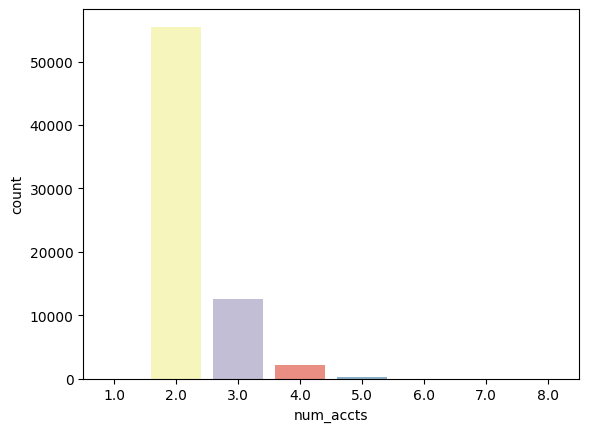

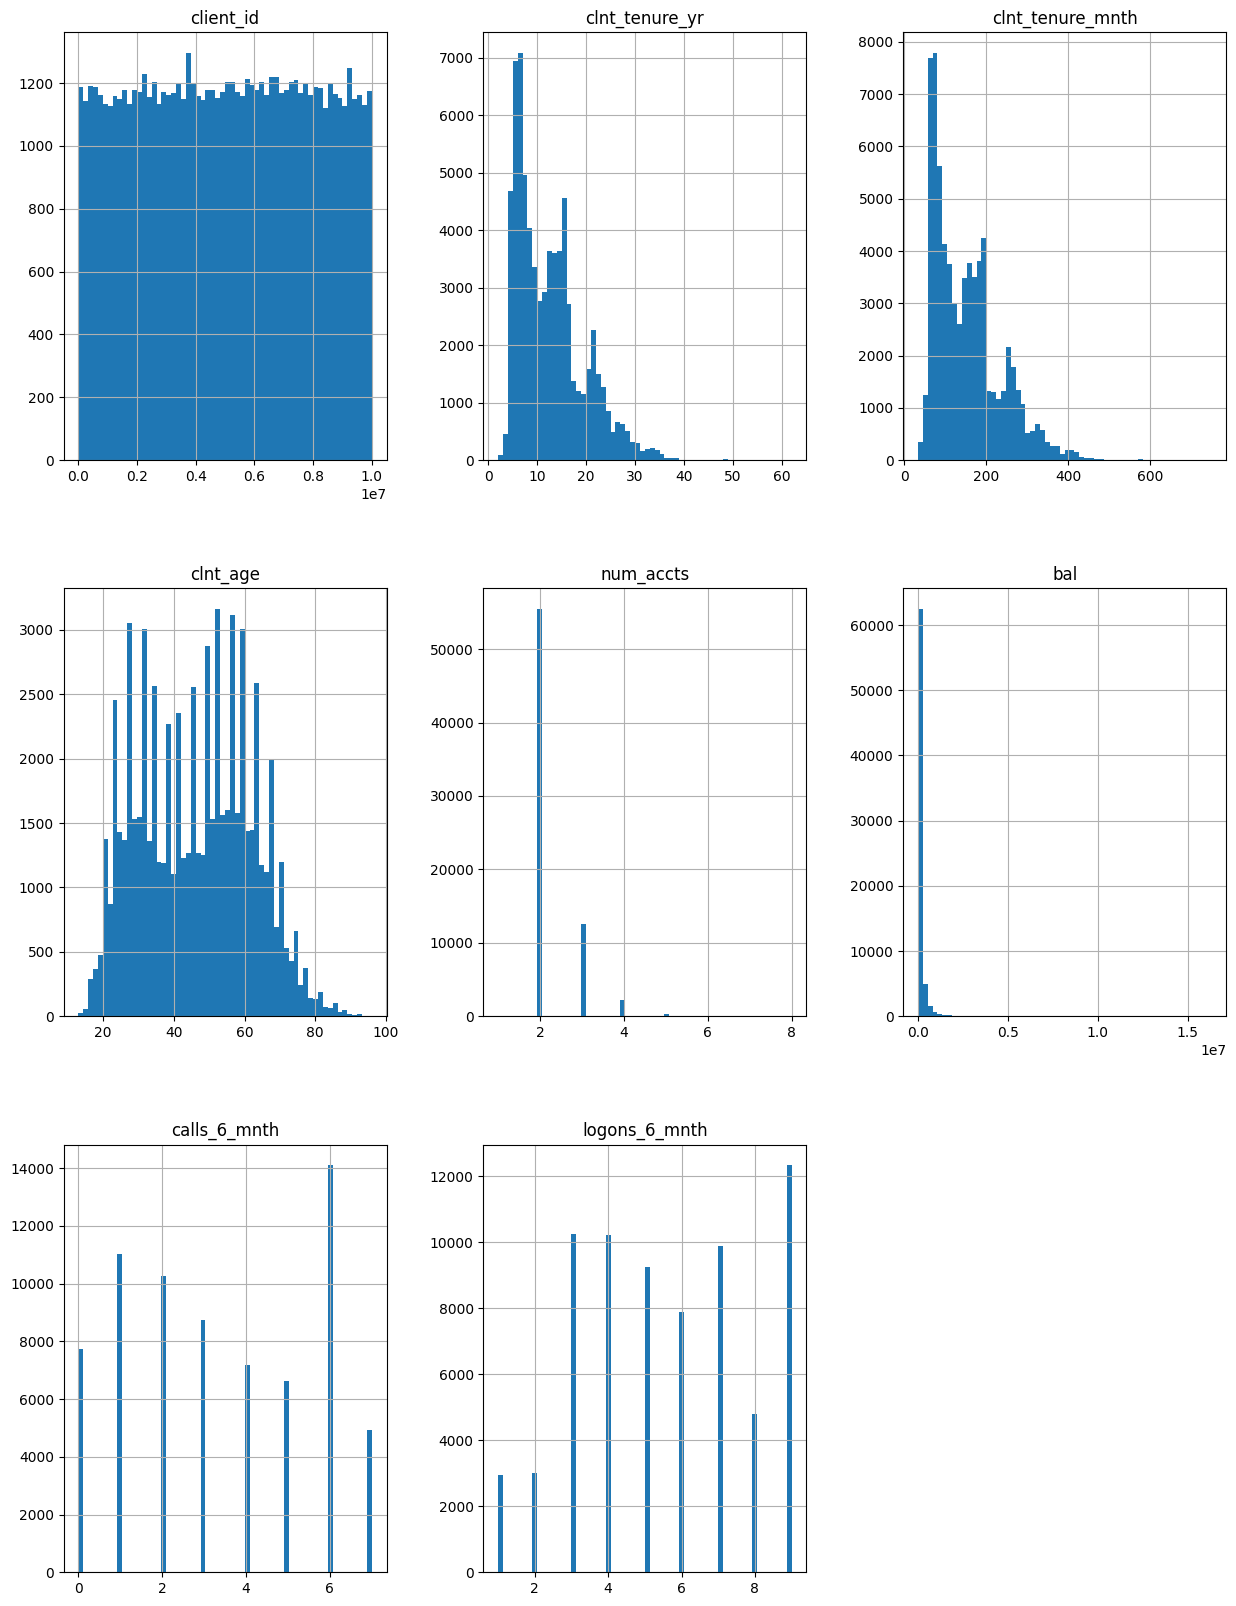

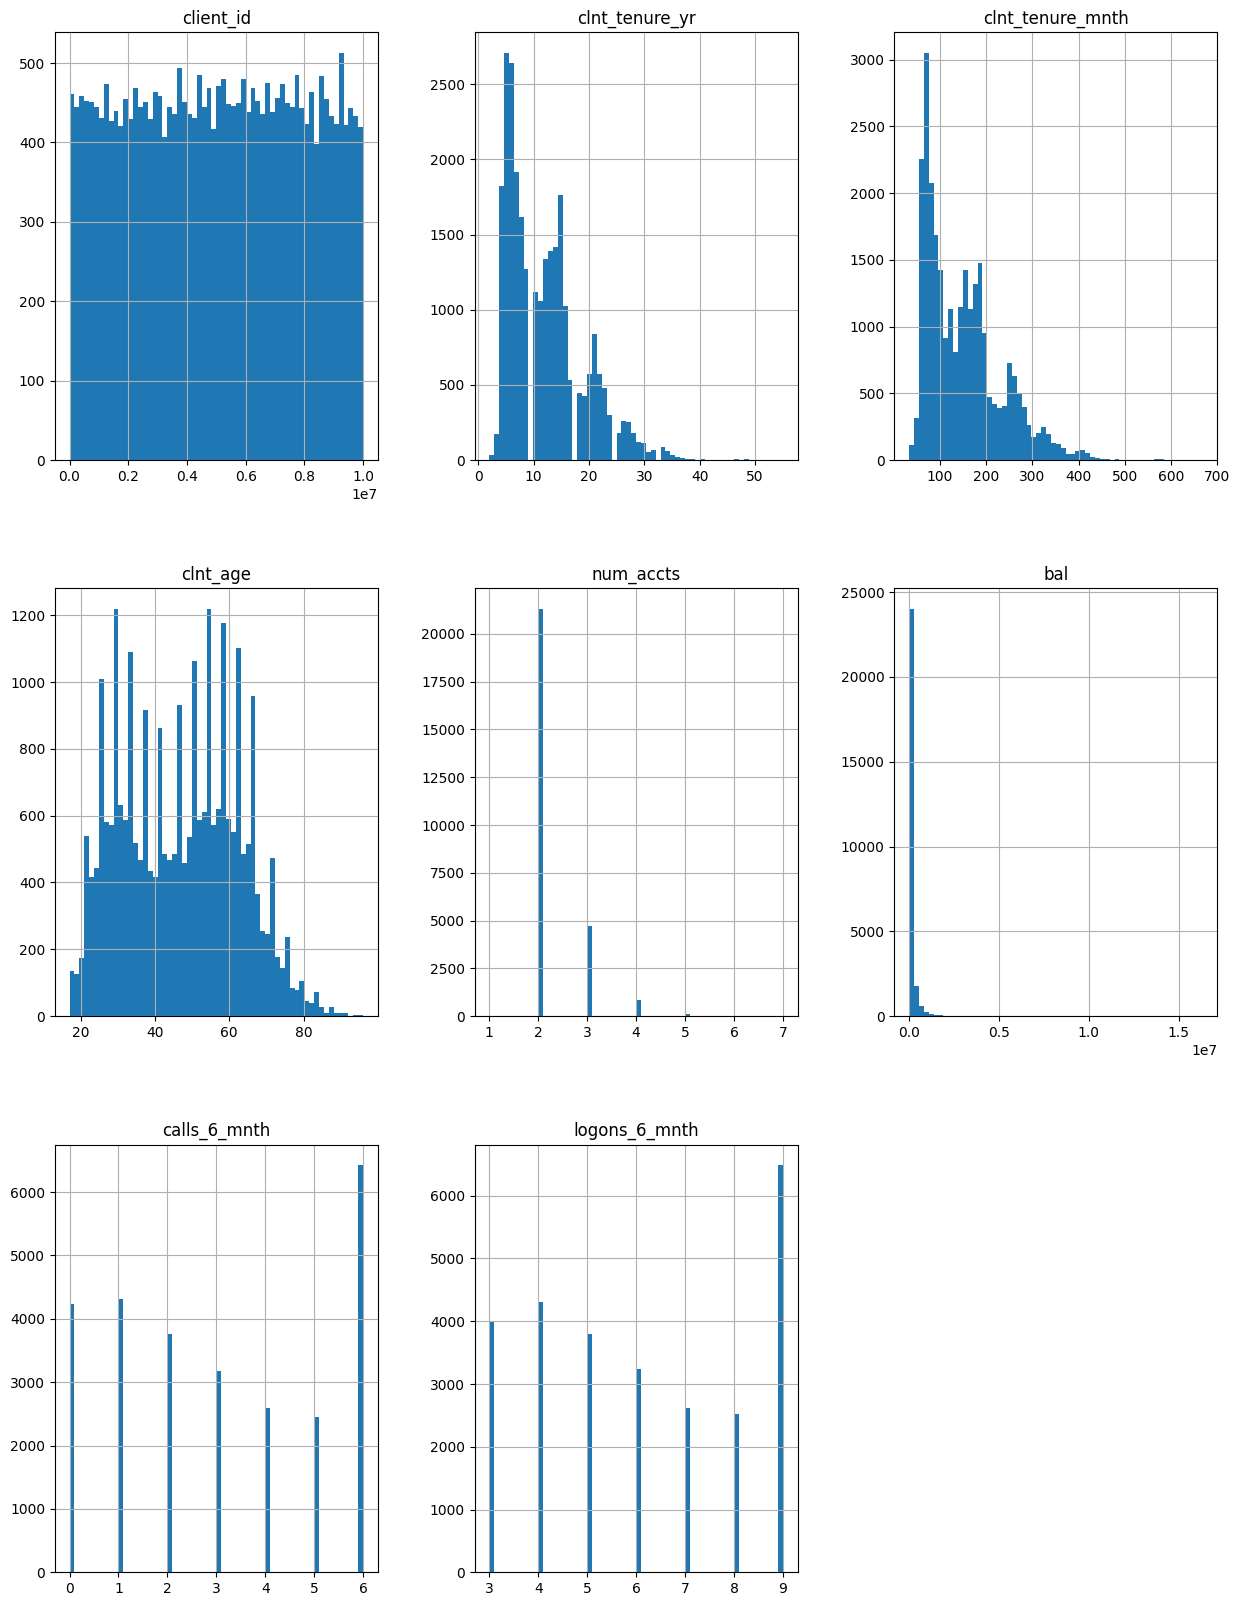

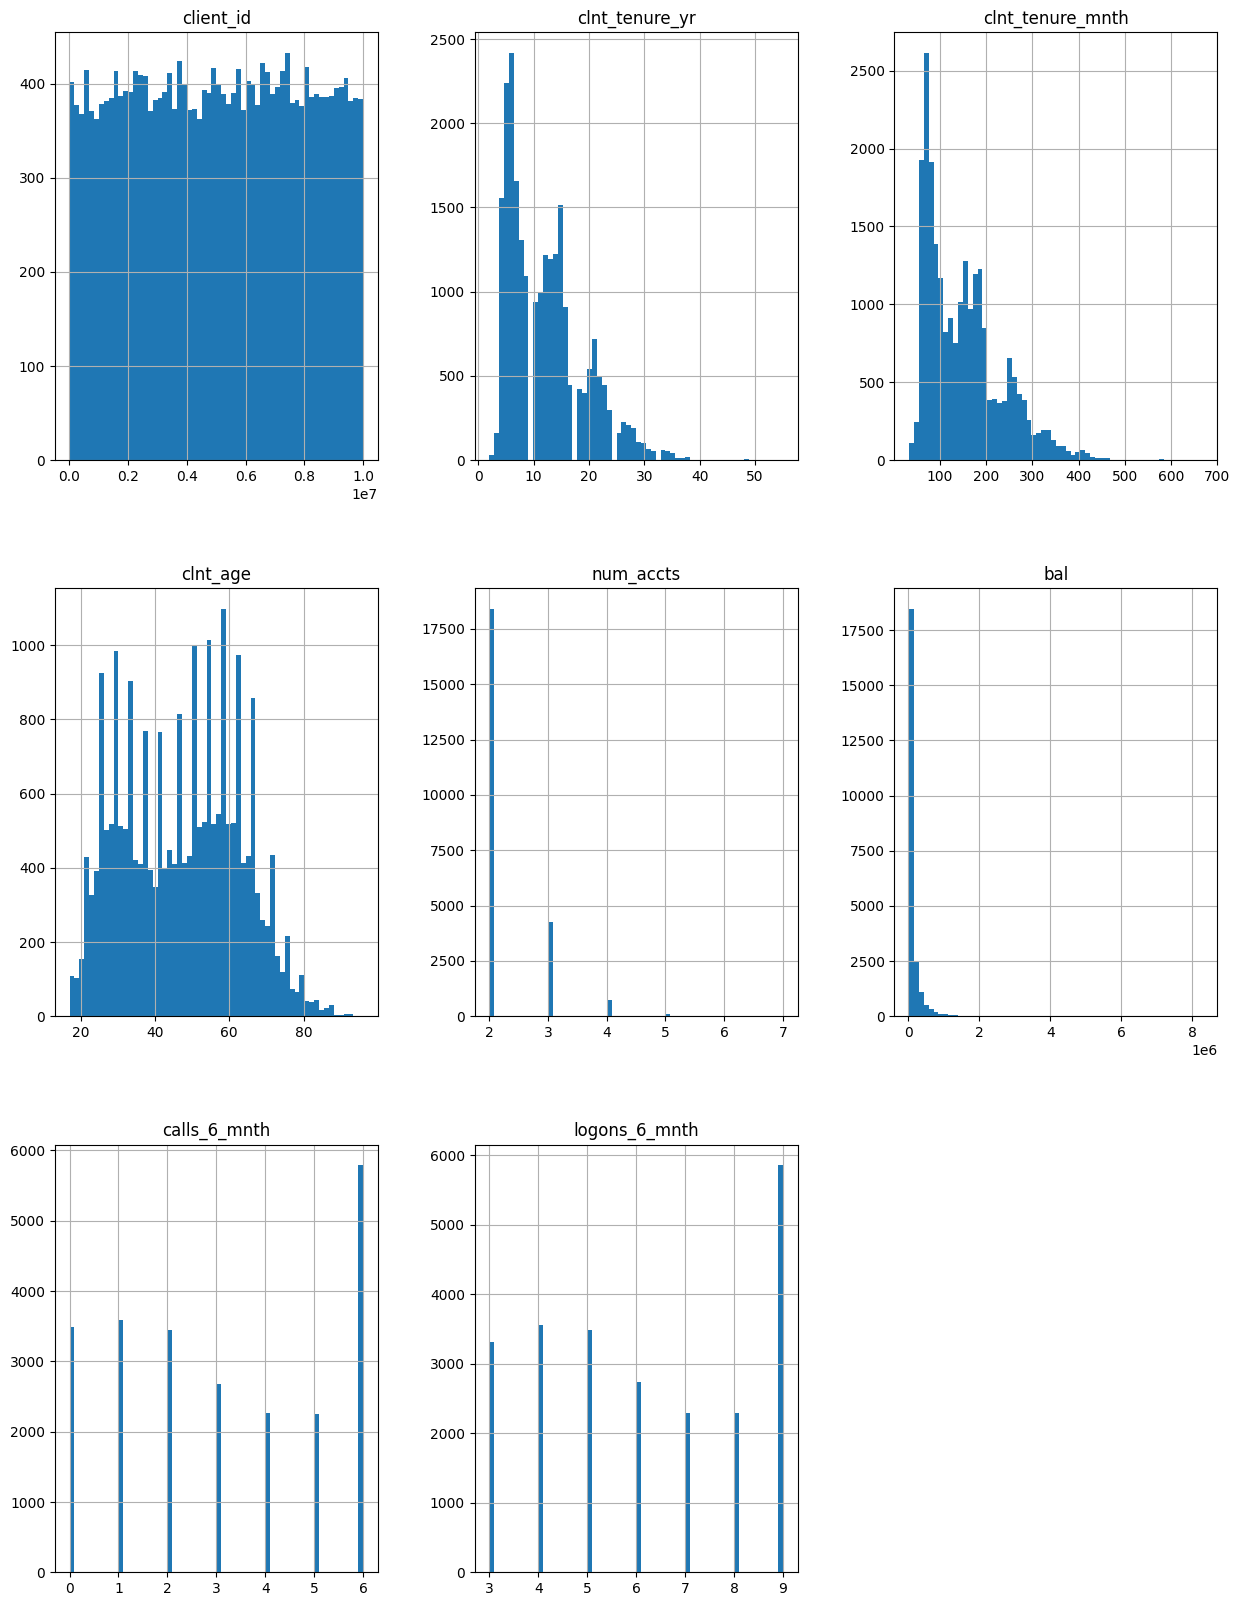

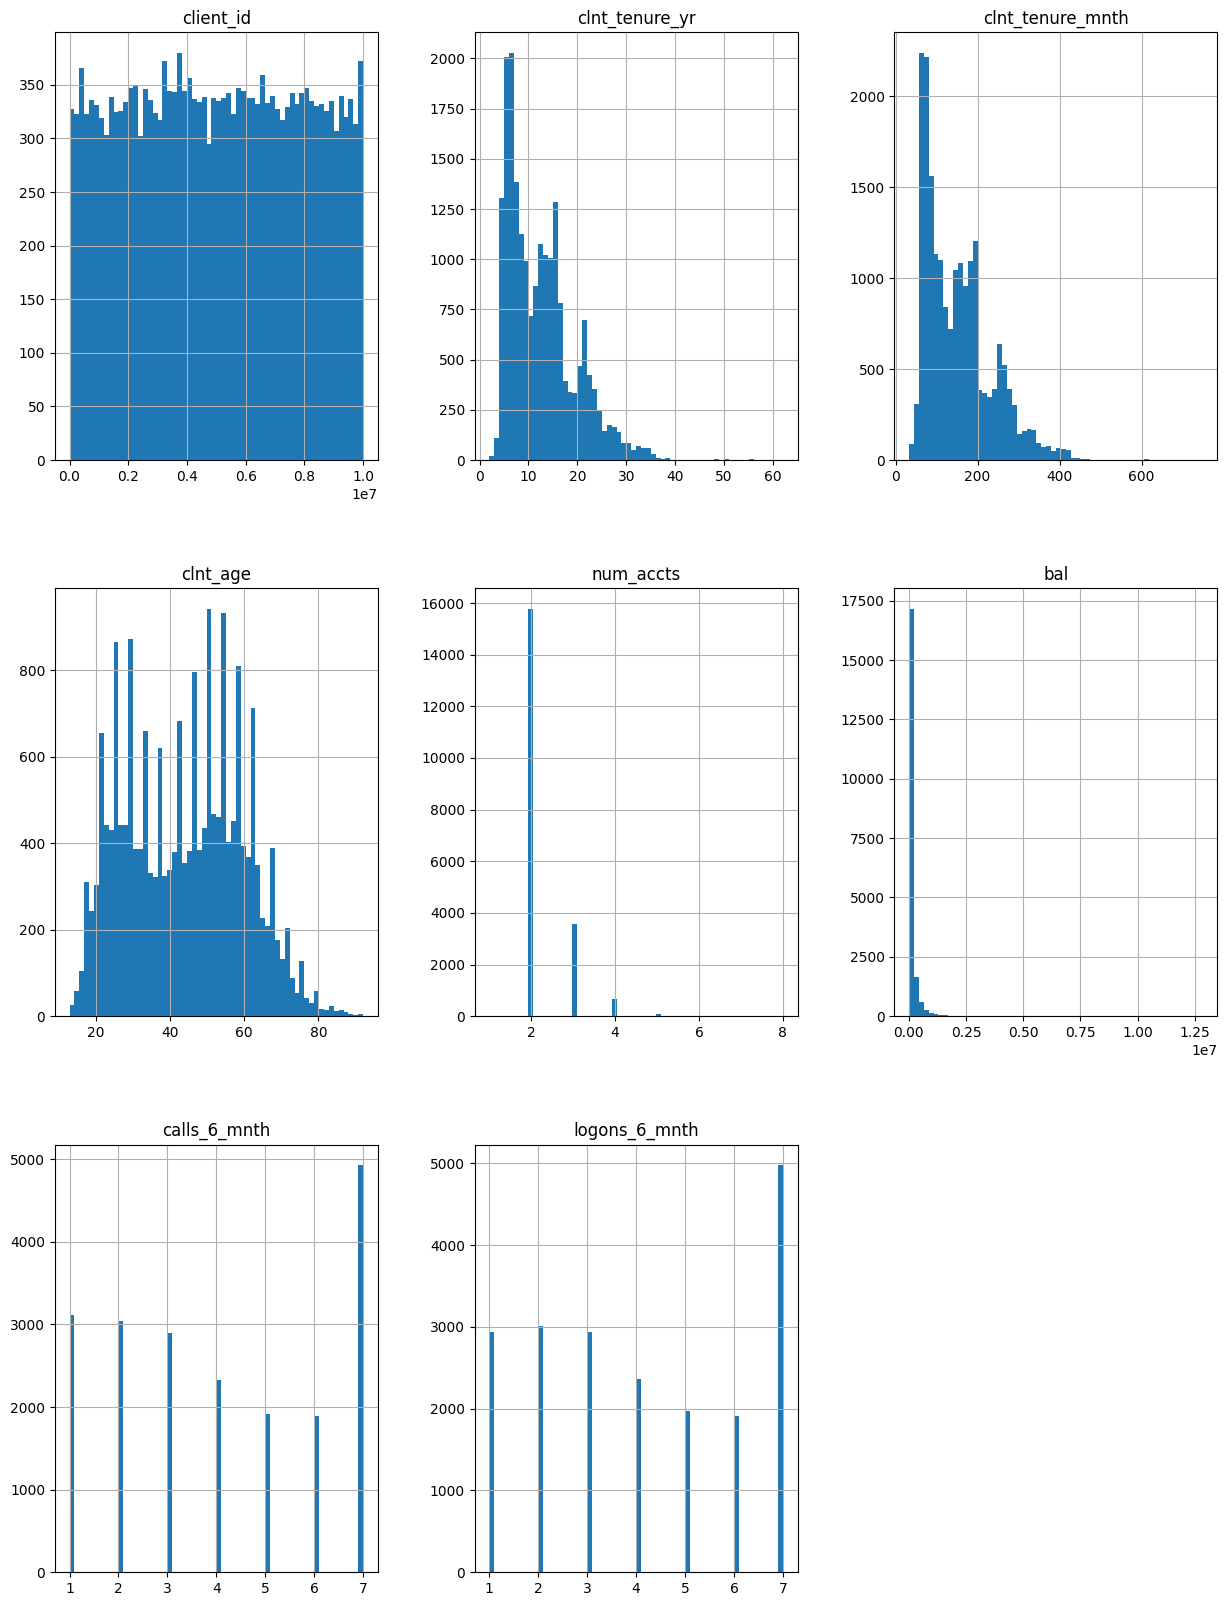

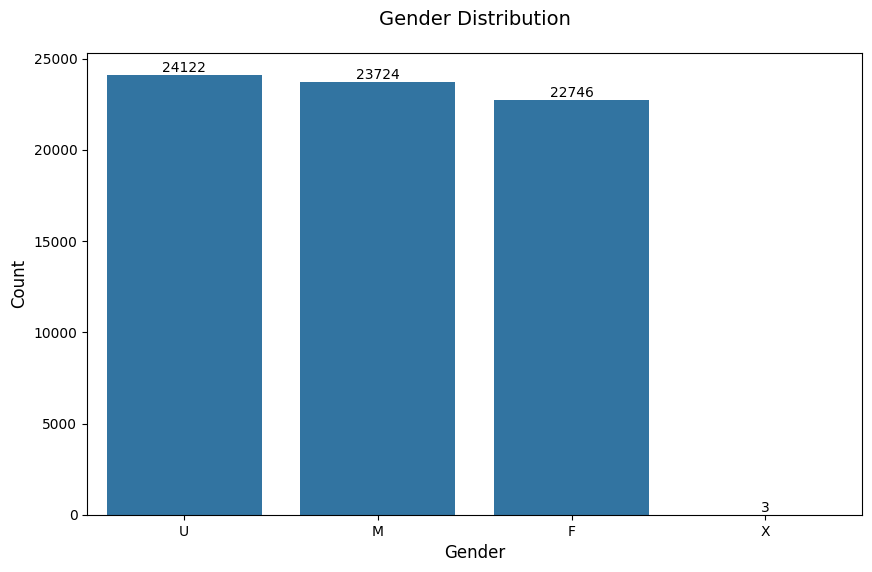

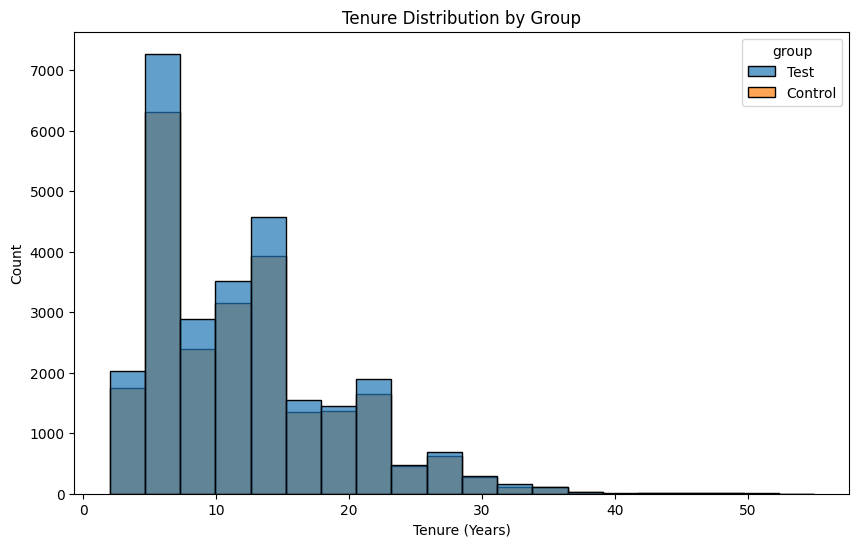

/var/folders/t2/40gs14tj4lg2536r26vzcyv40000gn/T/ipykernel_56388/2048933873.py:45: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Group')


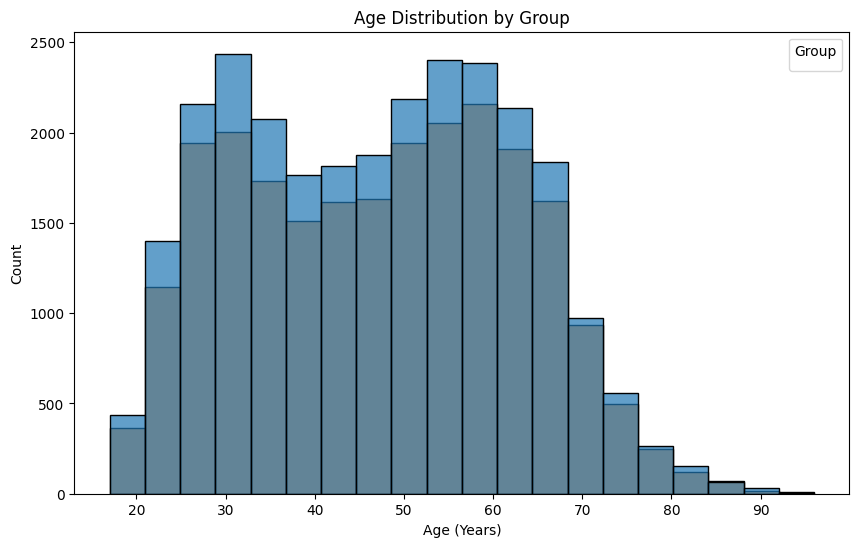

/var/folders/t2/40gs14tj4lg2536r26vzcyv40000gn/T/ipykernel_56388/2048933873.py:54: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Group')


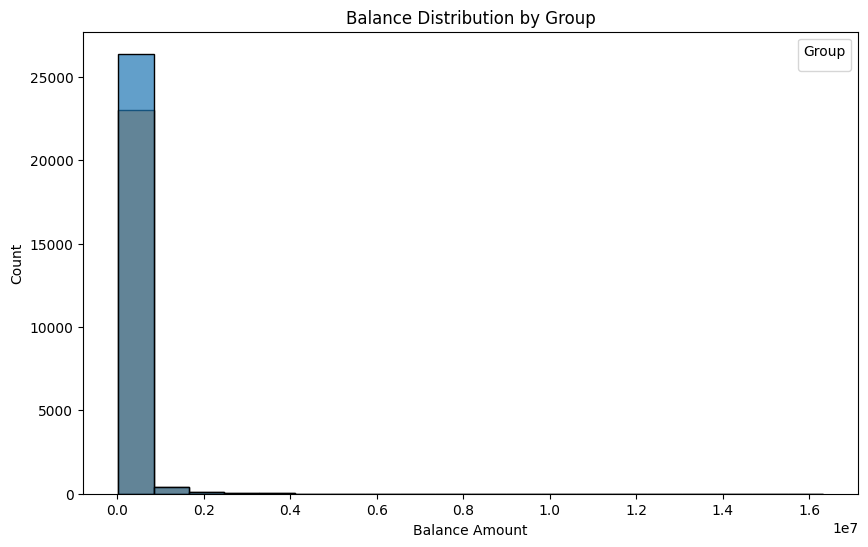

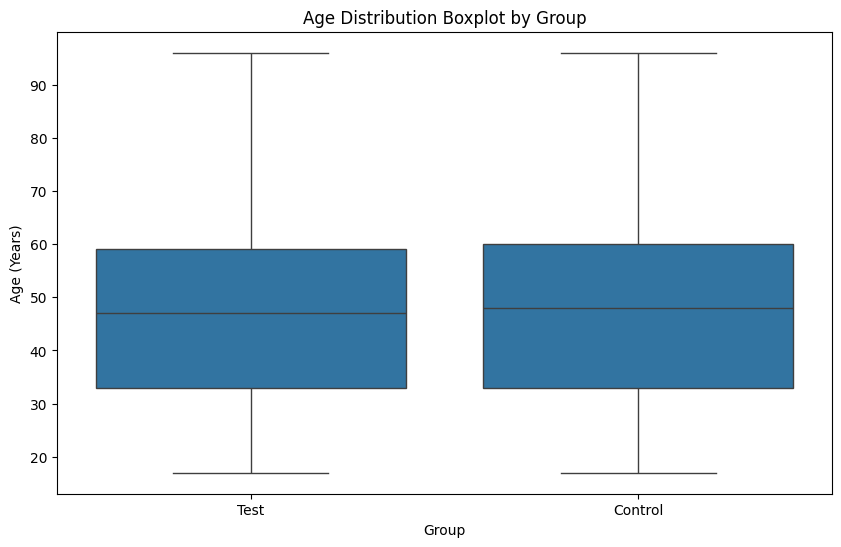

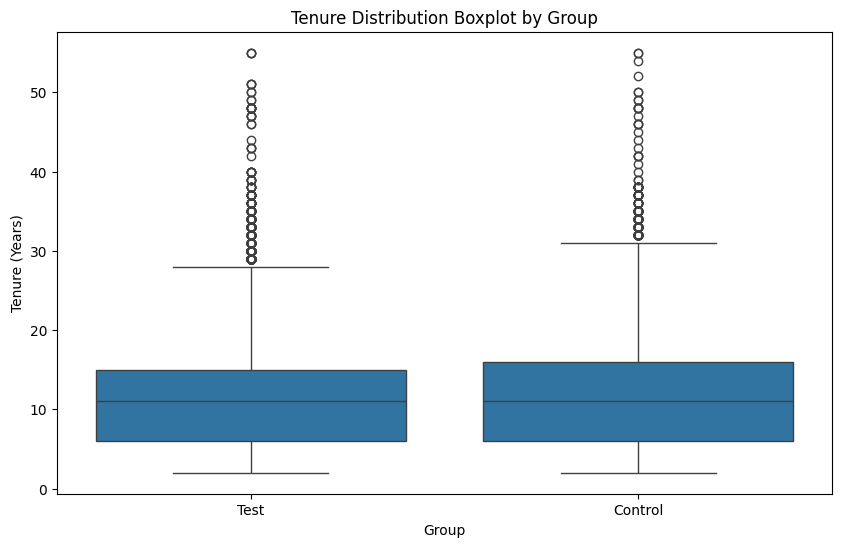

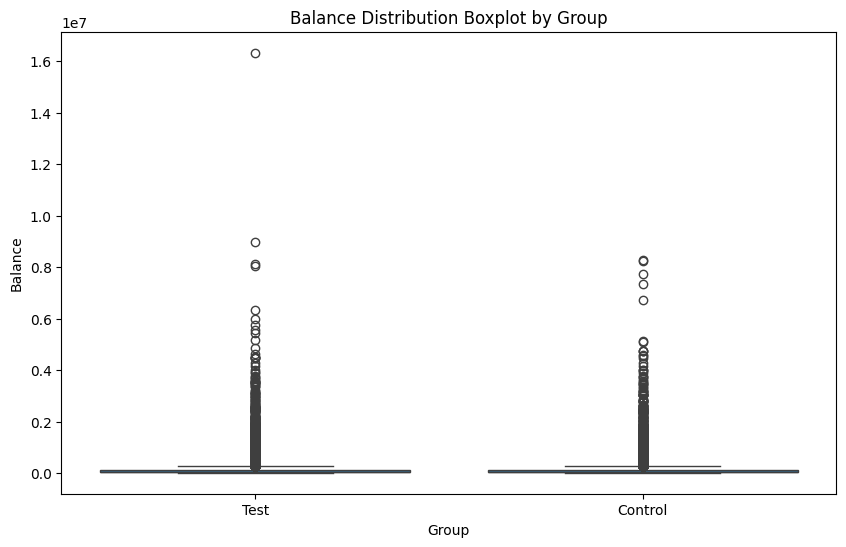

In [293]:
# Combine the test and control groups for analysis
df_clients_test['group'] = 'Test'
df_clients_control['group'] = 'Control'
combined_df = pd.concat([df_clients_test, df_clients_control], ignore_index=True)

# Gender Distribution Analysis
print("\n1. Gender Distribution Analysis:")
gender_counts = pd.crosstab(combined_df['Variation'], combined_df['gendr'])
print(gender_counts)


# Balance Analysis
print("\n2. Economic Status Analysis:")
balance_stats = combined_df.groupby('group')['bal'].agg(['mean', 'median', 'std'])
print(balance_stats.round(2))

# Age Analysis
print("\n3. Age Distribution Analysis:")
age_stats = combined_df.groupby('group')['clnt_age'].agg(['mean', 'median', 'std'])
print(age_stats.round(2))

# Digital Engagement Analysis
print("\n4. Digital Engagement Analysis:")
logon_stats = combined_df.groupby('group')['logons_6_mnth'].agg(['mean', 'median', 'std'])
print(logon_stats.round(2))


# Additional visualization for tenure analysis
plt.figure(figsize=(10, 6))
sns.histplot(data=combined_df, x='clnt_tenure_yr', hue='group', bins=20, alpha=0.7)
plt.title('Tenure Distribution by Group', fontsize=12)
plt.xlabel('Tenure (Years)')
plt.ylabel('Count')
plt.show()

# Show all the plots
plt.show()

# Age Distribution Comparison
plt.figure(figsize=(10, 6))
sns.histplot(data=combined_df, x='clnt_age', hue='group', bins=20, alpha=0.7)
plt.title('Age Distribution by Group', fontsize=12)
plt.xlabel('Age (Years)')
plt.ylabel('Count')
plt.legend(title='Group')
plt.show()

# Balance Distribution Comparison
plt.figure(figsize=(10, 6))
sns.histplot(data=combined_df, x='bal', hue='group', bins=20, alpha=0.7)
plt.title('Balance Distribution by Group', fontsize=12)
plt.xlabel('Balance Amount')
plt.ylabel('Count')
plt.legend(title='Group')
plt.show()

# Boxplot for Age Comparison by Group
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_df, x='group', y='clnt_age')
plt.title('Age Distribution Boxplot by Group', fontsize=12)
plt.xlabel('Group')
plt.ylabel('Age (Years)')
plt.show()

# Boxplot for Tenure Comparison by Group
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_df, x='group', y='clnt_tenure_yr')
plt.title('Tenure Distribution Boxplot by Group', fontsize=12)
plt.xlabel('Group')
plt.ylabel('Tenure (Years)')
plt.show()

# Boxplot for Balance Comparison by Group
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_df, x='group', y='bal')
plt.title('Balance Distribution Boxplot by Group', fontsize=12)
plt.xlabel('Group')
plt.ylabel('Balance')
plt.show()



In [294]:
#-----------Conclusion-------------------#
# When we take a look at the demographic variables for both groups, we observe a consistency in data distribution for variables such as Tenure distribution, age, and balance distribution.


#### **3. Were there any biases?**

In [296]:
# A valuable analysis would involve comparing the Test and Control groups over the long term. Some errors may stem from a lack of familiarity with the new UI,
#leading to an increase in error counts. 

# Consequently, conducting an analysis some time after the launch of the new UI could be beneficial, especially since the error rate is approaching the 5% threshold set by the business.

### Duration Assessment

**Was the timeframe of the experiment (from 3/15/2017 to 6/20/2017) adequate to gather meaningful data and insights?**

In [299]:
#check log ins per month

df_all_hypothesis["logons_6_mnth"].mean()/6

# we assume that the

combined_df["confirmed per visit"].value_counts()


KeyError: 'confirmed per visit'

### Additional Data Needs

**What other data, if available, could enhance the analysis?**

In [ ]:
df_merged_error_count = pd.concat([df_clients_test_error, df_clients_control_error], ignore_index=True)


In [ ]:
df_all_hypothesis = pd.merge(
    combined_df,                                      # The main DataFrame (left)
    df_merged_error_count[['client_id', 'error_count']],  # The 'confirmed per visit' column to add
    on='client_id',                                 # Merging based on the 'client_id' column
    how='left'                                      # Keep all rows from df_visits (left DataFrame)
)

In [ ]:
df_all_hypothesis["error_rate_per_visit"] = round(df_all_hypothesis["error_count"] / df_all_hypothesis["distinct_visit_count"], 2)

df_all_hypothesis.rename(columns={'Variation': 'variation'}, inplace=True)
df_all_hypothesis


In [ ]:
df_all_hypothesis.to_csv('df_all_hypothesis.csv', index=False)

In [ ]:
df_all_hypothesis_numerical = df_all_hypothesis[["clnt_tenure_mnth", "clnt_age", "num_accts", "bal", "calls_6_mnth","logons_6_mnth", "confirmed per visit", "error_count"]]
df_all_hypothesis_numerical_corr = df_all_hypothesis_numerical.corr()
df_all_hypothesis_numerical_corr

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have your correlation matrix
df_all_hypothesis_numerical_corr = df_all_hypothesis_numerical.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))  # Adjust the size of the heatmap
sns.heatmap(df_all_hypothesis_numerical_corr, annot=True, cmap='coolwarm', linewidths=0.5)

# Display the heatmap
plt.title("Correlation Heatmap")
plt.show()